<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/notebooks/Week4_Group_Project_LCROSS_and_DEM_Illum_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GEOL557 Week 4 Group Project


---


**Characterization of the Lunar LCROSS volatile measurements and adjacent area**

---


Britt Duffy Adkins, Hunter Danque, Deniz Donmez
(November 15, 2020)


#We incorporated the peer review feedback in two ways. One, we modified the concept map to clarify the use of distance from the LCROSS sample site. Two, a section of our work tried to parse Carbon, but we also captured Ca. Further, in our work, we use a package called chemparse for elemental composition, so the string search and pie plots for "C" are not needed. We deleted those cells for clarity.
 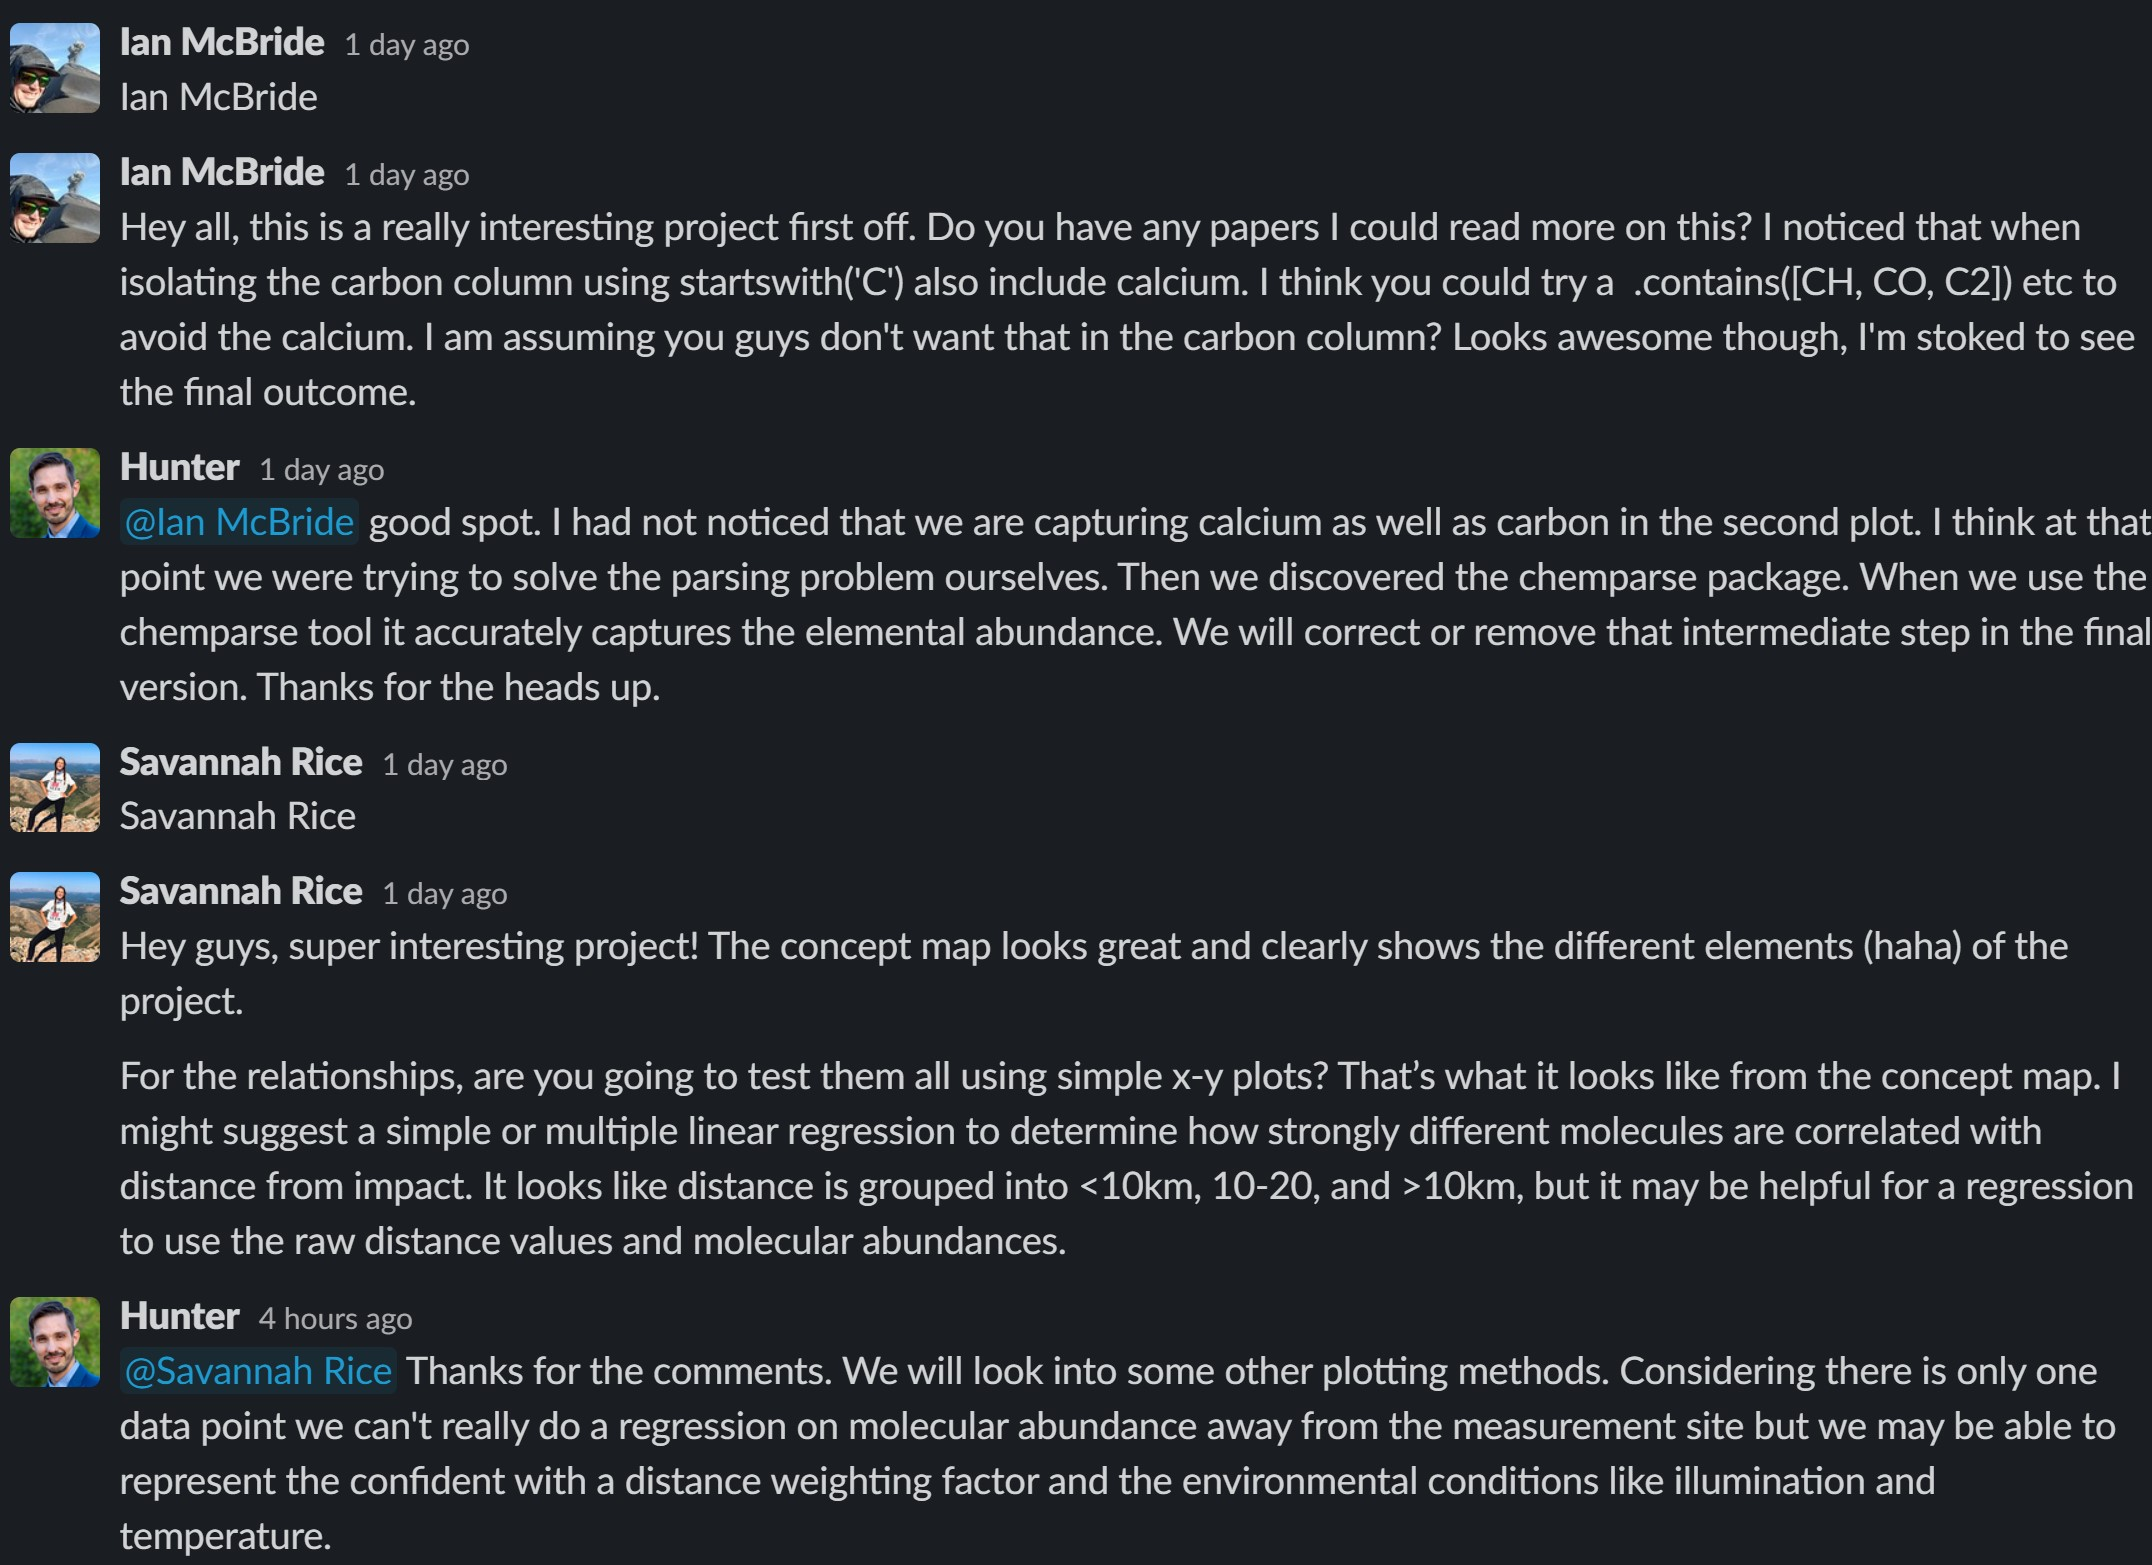  

The LCROSS impact in the Cabeus crater and spectroscopic analysis of the ejecta plume is the only "ground truth" of volatiles in Lunar Permanently Shadowed Regions (PSRs). As such, it is used as a baseline for molecular abundance in PSRs at both lunar poles. Our goal is to take a more conservative approach and map the critical environmental characteristics of PSRs, Illumination, Temperature, Topography, and distance weighting from the LCROSS site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. Last week we loaded the DEM and illumination grids to Pandas. This week we focused on the Molecular and Elemental abundance from the LCROSS spectroscopic measurements. We have parsed the molecules and counted atoms. The next step will be to calculate an elemental weight percent. Most lunar resource work focuses on the water observed (~5% by weight) and Hydrogen and Oxygen for rocket fuel use. We want to show there are other valuable elemental resources observed in the ejecta plume, although some valuable elements like Carbon are in multiple molecules.

The goal of the first section is to make a dataframe of the molecular abundance from the LCROSS impact in the Cabeus crater near the Lunar South Pole. The original data is from (Colaprete, et al., 2010) Table 2.


Colaprete, A., Schultz, P., Heldmann, J., Wooden, D., Shirley, M., Ennico, K., .
.. & Goldstein, D. (2010). Detection of water in the LCROSS ejecta plume. Science, 330(6003), 463-468.

These data were published in percentages relative to water. This is a hard way to read the data so Chris Dreyer and George Sowers converted them to weight percent. They provided the updated table to us in a personel communication Spring 2020.


------------------------------------------------------------------------
![ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris [2].png](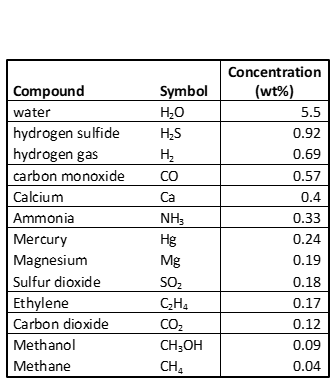) 

In [ ]:
#import key packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#first method of creating a pandas dataframe. In this we manually created a dictionary of the values and converted to a dataframe. 
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04]}
df = pd.DataFrame(data)
df

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,calcium,Ca,0.40
5,ammonia,NH3,0.33
6,mercury,Hg,0.24
7,magnesium,Mg,0.19
8,sulfur dioxide,SO2,0.18
9,ethylene,C2H4,0.17


In [ ]:
#alternate method of loading the data to a dataframe. The values were typed into an Excel file and saved as csv on GitHub. Then read from there. 
df2 = pd.read_csv('https://raw.githubusercontent.com/denizd1/GEOL557_Project/main/data/ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris.csv')
df2

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,Calcium,Ca,0.40
5,Ammonia,NH3,0.33
6,Mercury,Hg,0.24
7,Magnesium,Mg,0.19
8,Sulfur dioxide,SO2,0.18
9,Ethylene,C2H4,0.17


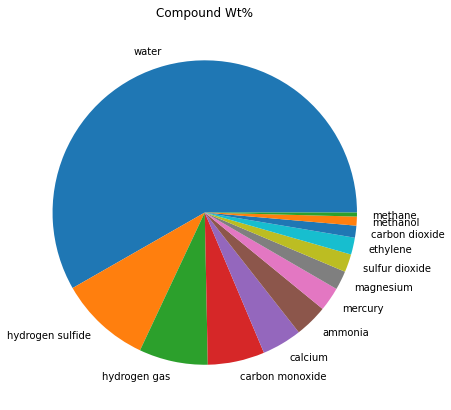

In [ ]:
# Creating plot with the weight percent of all the molecules observed by LCROSS
fig = plt.figure(figsize =(10, 7)) 
plt.pie(df['Concentration (wt%)'], labels = df['Compound']) 
plt.title('Compound Wt%')
# show plot 
plt.show() 

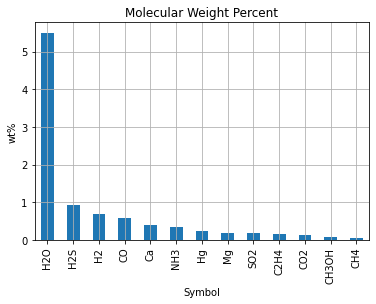

In [ ]:
# using the principals of minimizing unnecessary color to usful data ink this histogram conveys the information simply.
df2.plot(x='Symbol', y='Concentration (wt%)', kind='bar', legend=False)  
plt.ylabel('wt%')
plt.xlabel('Symbol')
plt.title('Molecular Weight Percent')
plt.grid()
plt.show()

In [ ]:
fig = px.scatter(df2, 
                 x="Concentration (wt%)", 
                 y="Concentration (wt%)", 
                 #size='Orthoclase', 
                 hover_data=['Compound'],
                 title='LCROSS Molecular Weight Percent'
                 )
fig.show()

We need to count atoms in the molecules. We could do this by hand in a couple of minutes but would like to do it using extensable tools. We found a package calle ChemParse. https://pypi.org/project/chemparse/

In [ ]:
pip install chemparse #https://pypi.org/project/chemparse/

  Created wheel for chemparse: filename=chemparse-0.1.0-cp36-none-any.whl size=2913 sha256=df51b27ff10bad551e502b9a5ac8f85092c2063866b82ba8dcd78f5fa99532c1
  Stored in directory: /root/.cache/pip/wheels/6d/14/a5/1fee5885ee2793f331fe97ce98392ab4ee79b02147bbb4a59d
Successfully built chemparse


In [ ]:
import chemparse #import chemparse 
print(chemparse.parse_formula("C6H12O6")) #test with given example

{'C': 6.0, 'H': 12.0, 'O': 6.0}


In [ ]:
df['Symbol'].to_list()[0] #learning how to use the chemparse by simplifying the input to the first molecule in our dataframe

'H2O'

In [ ]:
aa=chemparse.parse_formula(df['Symbol'].to_list()[0]) #learning how to use the chemparse by looking at the output type
print(type(aa))

<class 'dict'>


In [ ]:
elements=[]
for i in range(len(df['Symbol'].to_list())):
  elements.append(chemparse.parse_formula(df['Symbol'].to_list()[i]))
elements

[{'H': 2.0, 'O': 1.0},
 {'H': 2.0, 'S': 1.0},
 {'H': 2.0},
 {'C': 1.0, 'O': 1.0},
 {'Ca': 1.0},
 {'H': 3.0, 'N': 1.0},
 {'Hg': 1.0},
 {'Mg': 1.0},
 {'O': 2.0, 'S': 1.0},
 {'C': 2.0, 'H': 4.0},
 {'C': 1.0, 'O': 2.0},
 {'C': 1.0, 'H': 4.0, 'O': 1.0},
 {'C': 1.0, 'H': 4.0}]

In [ ]:
print(type(elements)) #list of dictionaries 

<class 'list'>


In [ ]:
df_e = pd.DataFrame(elements) #convert the list to a Pandas dataframe
df_e

,H,O,S,C,Ca,N,Hg,Mg
0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
9,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [ ]:
df_m = pd.concat([df, df_e], axis=1, sort=False) #combine the results of parsing the molecules with the original dataframe
df_m=df_m.fillna(0) #fill the NaN with 0
df_m

,Compound,Symbol,Concentration (wt%),H,O,S,C,Ca,N,Hg,Mg
0,water,H2O,5.50,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hydrogen sulfide,H2S,0.92,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,hydrogen gas,H2,0.69,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,carbon monoxide,CO,0.57,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,calcium,Ca,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,ammonia,NH3,0.33,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,mercury,Hg,0.24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,magnesium,Mg,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,sulfur dioxide,SO2,0.18,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ethylene,C2H4,0.17,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
df_m.iloc[:,3:12].sum()

H     21.0
O      7.0
S      2.0
C      6.0
Ca     1.0
N      1.0
Hg     1.0
Mg     1.0
dtype: float64

In [ ]:
df_atoms=[] #count atoms and make column of element symbols present in the sample
df_atoms=pd.DataFrame(df_m.iloc[:,3:12]).sum().reset_index() #calculate the sum of each unique atomic type for all molecules observed
df_atoms.columns =['Symbol', 'AtomCount']
df_atoms


,Symbol,AtomCount
0,H,21.0
1,O,7.0
2,S,2.0
3,C,6.0
4,Ca,1.0
5,N,1.0
6,Hg,1.0
7,Mg,1.0


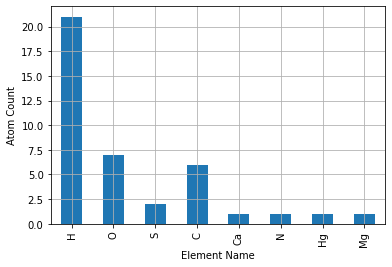

In [ ]:
# using the principals of minimizing unnecessary color to usful data ink this histogram conveys the information simply.
df_atoms.plot(x='Symbol', y='AtomCount', kind='bar', legend=False)  
plt.ylabel('Atom Count')
plt.xlabel('Element Name')
plt.grid()
plt.show()

This indicates there are enough carbon atoms to be of interest for resource use. The next steps will calculate the weight percent elemental abundance in the sample. 

In [ ]:
#Make a dataframe of the periodic table of elements from this location- https://gist.github.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee 
df_pt=pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')
df_pt.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,Radioactive,Natural,Metal,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,NaN,yes,NaN,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,NaN,yes,NaN,yes,NaN,Noble Gas,0.49,NaN,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,NaN,yes,yes,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,NaN,yes,yes,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,NaN,yes,NaN,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [ ]:
#I want just the two columns from the Periodic table with te Symbol and Atomic mass and 
#then I want to match the Symbol field to the previous dataframe. 
df_pt_sw=df_pt.iloc[:,2:4]
df_pt_sw

,Symbol,AtomicMass
0,H,1.007
1,He,4.002
2,Li,6.941
3,Be,9.012
4,B,10.811
...,...,...
113,Fl,289.000
114,Mc,288.000
115,Lv,292.000
116,Ts,295.000


Next I want to make a column of atomic weights and then multiply the weights by the number of atoms to get the atomic weight percent. A description of the process is here. 

https://www.scribd.com/doc/74247139/How-to-Convert-Atomic-Percent-to-Weight-Percent-and-Vice-Versa


In [ ]:
#make a dataframe with the Atomic Mass for the atoms in the sample. 
df_m_wt=df_pt_sw.loc[df_pt_sw['Symbol'].isin(df_atoms.Symbol) ]
df_m_wt


,Symbol,AtomicMass
0,H,1.007
5,C,12.011
6,N,14.007
7,O,15.999
11,Mg,24.305
15,S,32.065
19,Ca,40.078
79,Hg,200.590


In [ ]:
# spent alot of time trying to parse the "df_m_wt" by the symbol to return the atomic mass. 
#I have not figured it out yet. For now I copied and pasted the values I need below. 
#I am also not sure of the formula. This does not look right yet. Will continue to work on it. 
df_m['Hwt']=df_m['H']*df_m['Concentration (wt%)']*1.007
df_m['Owt']=df_m['O']*df_m['Concentration (wt%)']*15.999
df_m['Cwt']=df_m['C']*df_m['Concentration (wt%)']*12.011
df_m['Swt']=df_m['S']*df_m['Concentration (wt%)']*32.065
df_m['Nwt']=df_m['N']*df_m['Concentration (wt%)']*14.007
df_m


,Compound,Symbol,Concentration (wt%),H,O,S,C,Ca,N,Hg,Mg,Hwt,Owt,Cwt,Swt,Nwt
0,water,H2O,5.50,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.07700,87.99450,0.00000,0.0000,0.00000
1,hydrogen sulfide,H2S,0.92,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.85288,0.00000,0.00000,29.4998,0.00000
2,hydrogen gas,H2,0.69,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.38966,0.00000,0.00000,0.0000,0.00000
3,carbon monoxide,CO,0.57,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,9.11943,6.84627,0.0000,0.00000
4,calcium,Ca,0.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0000,0.00000
5,ammonia,NH3,0.33,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.99693,0.00000,0.00000,0.0000,4.62231
6,mercury,Hg,0.24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.00000,0.00000,0.0000,0.00000
7,magnesium,Mg,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.00000,0.00000,0.0000,0.00000
8,sulfur dioxide,SO2,0.18,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,5.75964,0.00000,5.7717,0.00000
9,ethylene,C2H4,0.17,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.68476,0.00000,4.08374,0.0000,0.00000


In [ ]:
df_m.iloc[:,11:20].sum()

Hwt     16.52487
Owt    108.15324
Cwt     13.93276
Swt     35.27150
Nwt      4.62231
dtype: float64

#getting closer. Once the atomic weight percent formula is completed we will redo the sumation of the all the carbon atoms in the various molecules. 

# DEM and Hillshade Gird load and visulization

In [ ]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


In [ ]:
pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

     |████████████████████████████████| 1.4MB 5.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.3MB 223kB/s 
     |████████████████████████████████| 972kB 45.7MB/s 
     |████████████████████████████████| 14.8MB 180kB/s 
     |████████████████████████████████| 6.5MB 25.7MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=3d31786826e73d3b783747fa39e14c6f4c089a0495a30d6a4ca4c1375cb42b44
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [ ]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib.pyplot as plt


In [ ]:
%pwd

'/content'

In [ ]:
#Many issue with CD to the Shared drive location but if I remove the % the cd function seems to work. 
#However, it may be necessary to cd folder by folder. 
#cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data

/content/gdrive/Shared drives/GEOL557_Group_Project/data


In [ ]:
%ls #verify the files

 AVGVISIB_85S_060M_201608_clp_rs10m.tfw   polar_south_80_sw_max_diff.txt
 AVGVISIB_85S_060M_201608_clp_rs10m.tif   polar_south_80_winter_min.png
 dp_archsis.pdf                           polar_south_80_winter_min.txt
'dp_sis (1).pdf'                          Shapefiles/
 polar_south_80_summer_max.txt            spoledem10m_clp.tfw
 polar_south_80_sw_max_diff.png           spoledem10m_clp.tif


In [ ]:
with rio.open('spoledem10m_clp.tif') as spDEM10m: #open the geotif file with RasterIO
      spDEM10m_np= spDEM10m.read(1)


In [ ]:
spDEM10m 

<closed DatasetReader name='spoledem10m_clp.tif' mode='r'>

In [ ]:
spDEM10m_np #numpy array 

array([[ -655,  -656,  -656, ...,  -813,  -813,  -813],
       [ -655,  -656,  -656, ...,  -812,  -812,  -812],
       [ -655,  -656,  -656, ...,  -811,  -811,  -811],
       ...,
       [-2346, -2347, -2348, ..., -1512, -1512, -1512],
       [-2346, -2347, -2348, ..., -1512, -1512, -1511],
       [-2346, -2347, -2348, ..., -1510, -1511, -1510]], dtype=int16)

In [ ]:
df_spDEM10m = pd.DataFrame(data=spDEM10m_np) #Numpy array to Pandas dataframe

In [ ]:
df_spDEM10m.iloc[0:5, 0:10] #look at a corner of the data array

,0,1,2,3,4,5,6,7,8,9
0,-655,-656,-656,-657,-658,-659,-660,-660,-661,-662
1,-655,-656,-656,-657,-658,-658,-659,-660,-661,-661
2,-655,-656,-656,-657,-657,-658,-659,-659,-660,-661
3,-655,-656,-656,-657,-657,-658,-658,-659,-660,-660
4,-655,-656,-656,-657,-657,-658,-658,-659,-659,-660


In [ ]:
df_spDEM10m.info() #get info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10768 entries, 0 to 10767
Columns: 11620 entries, 0 to 11619
dtypes: int16(11620)
memory usage: 238.7 MB


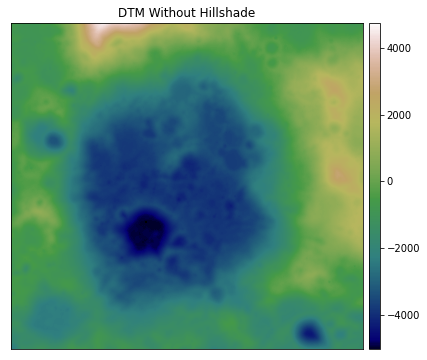

In [ ]:
# use EarthPy to plot the data with the instructions from this link 
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_spDEM10m,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

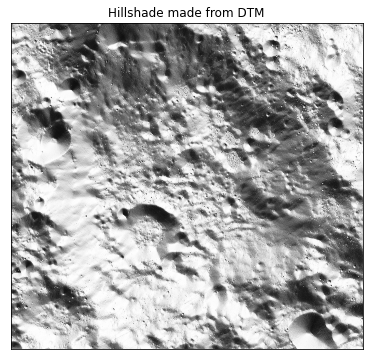

In [ ]:
# Create and plot the hillshade with earthpy 
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM10m)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6),
)
plt.show()

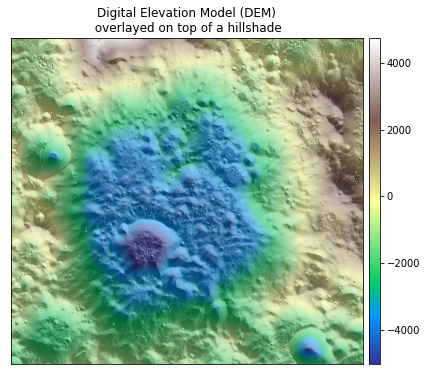

In [ ]:
# Plot the DEM and hillshade at the same time

fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    df_spDEM10m,
    ax=ax,
    cmap="terrain",
    title="Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()

#The hillshade and DEM cover all of Cabeus crater. In future weeks we will plot the impact location and other features of interest and reference. We need a north arrow and scale bar too but have to learn how to add them. 

# Illumination Grid load and visulization

In [ ]:
%ls

 AVGVISIB_85S_060M_201608_clp_rs10m.tfw   polar_south_80_sw_max_diff.txt
 AVGVISIB_85S_060M_201608_clp_rs10m.tif   polar_south_80_winter_min.png
 dp_archsis.pdf                           polar_south_80_winter_min.txt
'dp_sis (1).pdf'                          Shapefiles/
 polar_south_80_summer_max.txt            spoledem10m_clp.tfw
 polar_south_80_sw_max_diff.png           spoledem10m_clp.tif


In [ ]:
with rio.open('AVGVISIB_85S_060M_201608_clp_rs10m.tif') as AVGVIS_SUN60m:
      AVGVIS_SUN60m_np= AVGVIS_SUN60m.read(1)

In [ ]:
AVGVIS_SUN60m

<closed DatasetReader name='AVGVISIB_85S_060M_201608_clp_rs10m.tif' mode='r'>

In [ ]:
AVGVIS_SUN60m_np

array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [    0,     0,     0, ...,  2003,  2003,  2003],
       [    0,     0,     0, ...,  2003,  2003,  2003],
       [    0,     0,     0, ...,  2003,  2003,  2003]], dtype=int16)

In [ ]:
df_AVGVIS_SUN60m_np = pd.DataFrame(data=AVGVIS_SUN60m_np) #Numpy array to Pandas dataframe

In [ ]:
df_AVGVIS_SUN60m_np.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11582,11583,11584,11585,11586,11587,11588,11589,11590,11591,11592,11593,11594,11595,11596,11597,11598,11599,11600,11601,11602,11603,11604,11605,11606,11607,11608,11609,11610,11611,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
0,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
1,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
2,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
3,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767
4,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,...,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767


In [ ]:
df_AVGVIS_SUN60m_np.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Columns: 11622 entries, 0 to 11621
dtypes: int16(11622)
memory usage: 238.9 MB


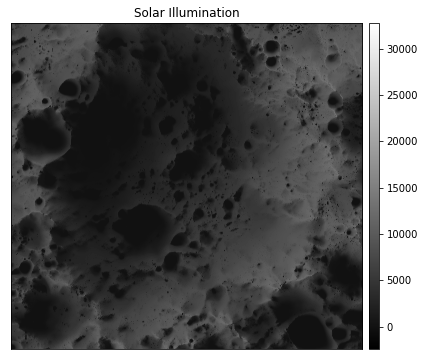

In [ ]:
# Plot the data https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_AVGVIS_SUN60m_np,
    cmap="gray",
    title="Solar Illumination",
    figsize=(10, 6),
)
plt.show()

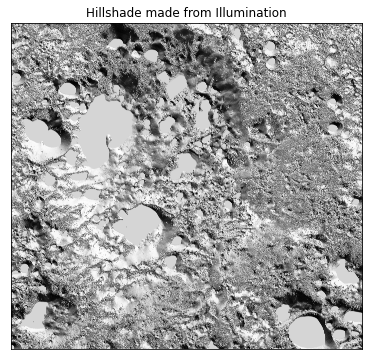

In [ ]:
# Create and plot the hillshade with earthpy https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_AVGVIS_SUN60m_np)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from Illumination", figsize=(10, 6),
)
plt.show()

#Extra stuff

In [ ]:
# Create and plot the hillshade with earthpy https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_resample_avgvis_sun60m)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6),
)
plt.show()

NameError: ignored

In [ ]:
# http://scipy.github.io/devdocs/generated/scipy.ndimage.zoom.html#scipy.ndimage.zoom
#resample_avgvis_sun60m=ndimage.zoom(AVGVIS_SUN60m_np, 6, order=3)
#df_resample_avgvis_sun60m = pd.DataFrame(data=resample_avgvis_sun60m)
#df_resample_avgvis_sun60m.info()

In [ ]:
# Plot the data https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_resample_avgvis_sun60m,
    cmap="gist_earth",
    title="After Resample",
    figsize=(10, 6),
)
plt.show()